Added column 'NewColumn' to benin-malanville with default value 0.
Added column 'NewColumn' to sierraleone-bumbuna with default value 0.
Added column 'NewColumn' to togo-dapaong_qc with default value 0.
Data prepared for benin-malanville.
Data prepared for sierraleone-bumbuna.
Data prepared for togo-dapaong_qc.


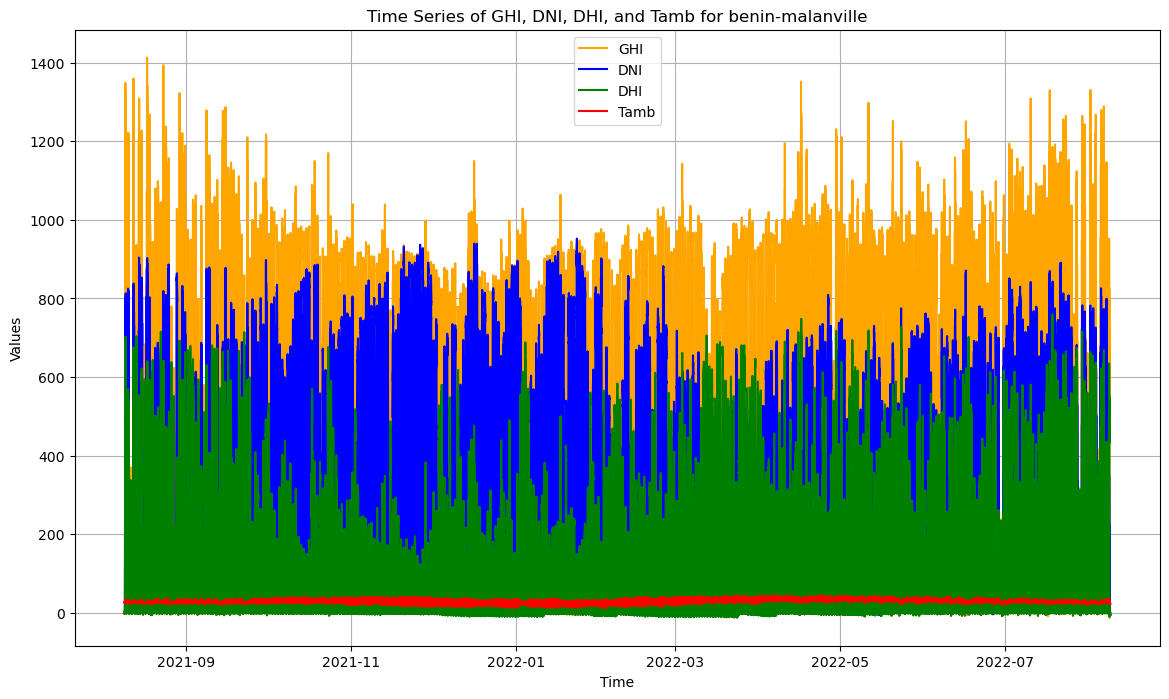

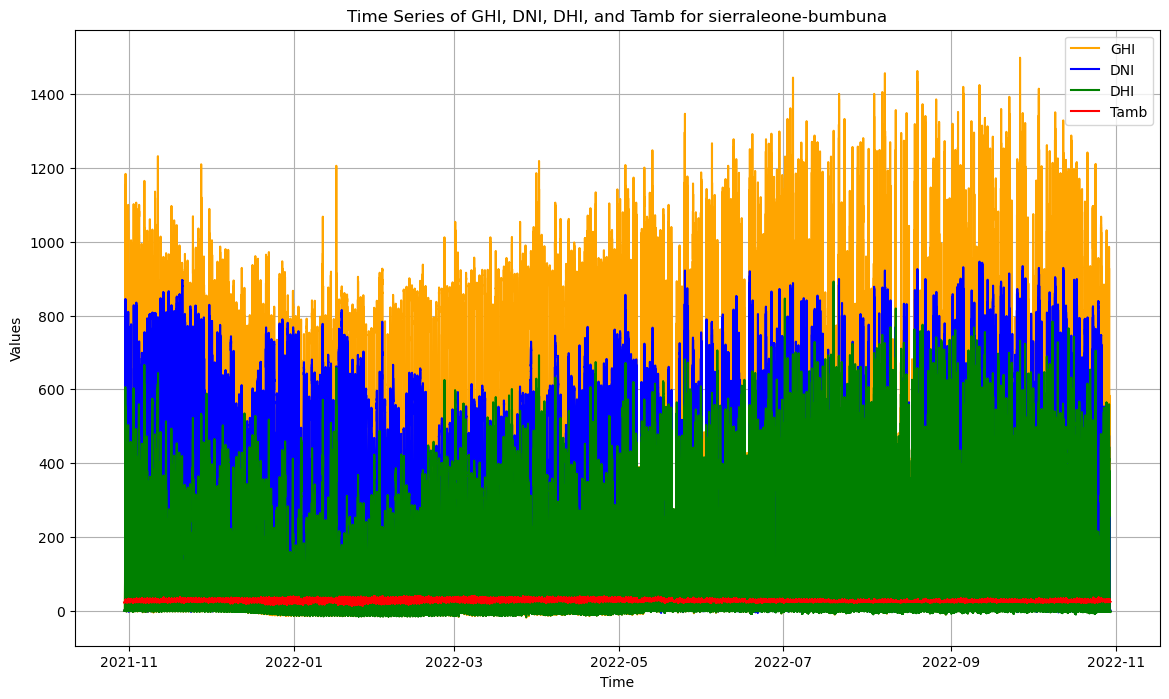

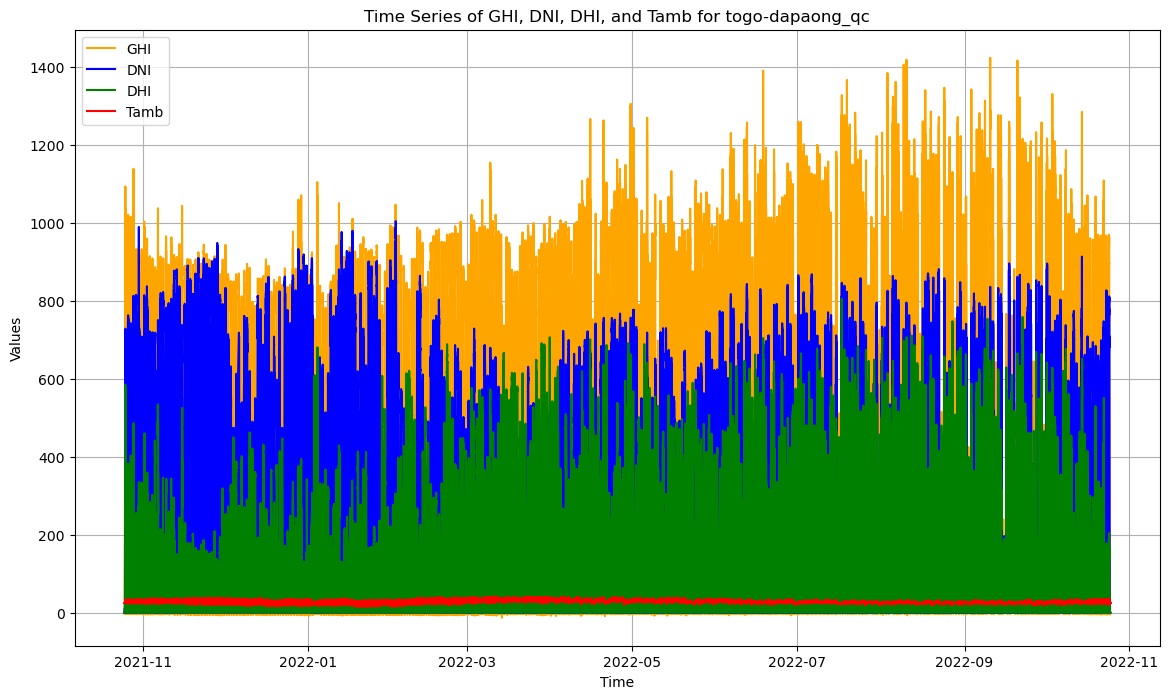

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths for the saved datasets
file_paths = {
    'benin-malanville': 'benin-malanville_data.csv',
    'sierraleone-bumbuna': 'sierraleone-bumbuna_data.csv',
    'togo-dapaong_qc': 'togo-dapaong_qc_data.csv'
}

class TimeSeriesAnalyzer:
    def __init__(self, file_paths):
        # Load datasets
        self.dataframes = {country: pd.read_csv(path) for country, path in file_paths.items()}

    def add_new_column(self, column_name, default_value):
        """
        Adds a new column to each dataframe with a default value.
        """
        for country, df in self.dataframes.items():
            df[column_name] = default_value
            print(f"Added column '{column_name}' to {country} with default value {default_value}.")

    def prepare_data(self):
        """
        Converts 'Timestamp' column to datetime format and sets it as index.
        """
        for country, df in self.dataframes.items():
            if 'Timestamp' not in df.columns:
                print(f"'Timestamp' column missing for {country}. Skipping preparation.")
                continue

            # Convert 'Timestamp' column to datetime format
            df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

            # Drop rows with NaT values in 'Timestamp'
            df.dropna(subset=['Timestamp'], inplace=True)

            # Set 'Timestamp' column as the index
            df.set_index('Timestamp', inplace=True)
            
            print(f"Data prepared for {country}.")

    def plot_time_series(self):
        """
        Plots time series for GHI, DNI, DHI, and Tamb.
        """
        for country, df in self.dataframes.items():
            # Check if required columns are present
            required_columns = ['GHI', 'DNI', 'DHI', 'Tamb']
            missing_columns = [col for col in required_columns if col not in df.columns]
            
            if missing_columns:
                print(f"Missing columns {missing_columns} in {country}. Skipping plot.")
                continue

            # Plot time series
            plt.figure(figsize=(14, 8))

            plt.plot(df.index, df['GHI'], label='GHI', color='orange')
            plt.plot(df.index, df['DNI'], label='DNI', color='blue')
            plt.plot(df.index, df['DHI'], label='DHI', color='green')
            plt.plot(df.index, df['Tamb'], label='Tamb', color='red')

            plt.title(f"Time Series of GHI, DNI, DHI, and Tamb for {country}")
            plt.xlabel('Time')
            plt.ylabel('Values')
            plt.legend()
            plt.grid(True)
            plt.show()
            plt.savefig('3rd.png')

# Create an instance of TimeSeriesAnalyzer
time_series_analyzer = TimeSeriesAnalyzer(file_paths)

# Add a new column if needed
# Example: Adding a column named 'NewColumn' with a default value of 0
time_series_analyzer.add_new_column('NewColumn', 0)

# Prepare the data
time_series_analyzer.prepare_data()

# Plot time series for each country
time_series_analyzer.plot_time_series()


In [12]:
import matplotlib.pyplot as plt

# After creating your plot
plt.savefig('filename.png')


<Figure size 640x480 with 0 Axes>